# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.
from sklearn.preprocessing import LabelEncoder # To do label encoding
# from lightfm import LightFM # Hybrid Recommendation Model Base

In [ ]:
# importing if online
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT Capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT Capstone/song_data.csv')

In [ ]:
# import data if local
# count_df = pd.read_csv("G:\My Drive\Colab Notebooks\MIT Capstone\count_data.csv")
# song_df = pd.read_csv("G:\My Drive\Colab Notebooks\MIT Capstone\song_data.csv")

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
df = pd.merge(count_df, song_df, on = 'song_id', how = 'left').drop_duplicates(subset = ['user_id','song_id'])

# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# Check successful merge and column 'Unnamed: 0' has been dropped
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
# Confirm duplicates have been removed
print('Number of Duplicates:', df.duplicated(subset = ['user_id','song_id']).sum())

Number of Duplicates: 0


In [ ]:
# Check shape of merged dataset
print('Dataframe shape:', df.shape)

Dataframe shape: (2000000, 7)


In [ ]:
# Get rid of artists that have all null values for year
df_year_sum = df.groupby('artist_name').sum()['year'].to_frame('year_sum').reset_index()
no_year = []
no_year = df_year_sum.loc[df_year_sum['year_sum'] == 0, 'artist_name']
df_artist = df.loc[~df['artist_name'].isin(no_year)]

# Get "artist_prime" using mode method: .agg(pd.Series.mode) 2636 rows × 2 columns
df_no_zero = df_artist.loc[df_artist['year'] != 0]
df_prime = df_no_zero.groupby(['artist_name']).median()['year'].to_frame('artist_prime').reset_index()

In [ ]:
# Merge artist_prime to df
df_complete = pd.merge(df, df_prime, how = 'left', on = 'artist_name')

In [ ]:
# Fill null years with prime years if available
df_complete['year'] = df_complete['year'].replace({0:np.nan})
df_complete.year.fillna(df_complete.artist_prime, inplace = True)

In [ ]:
# Fill all remaining null values with zero and make int type
df_complete = df_complete.replace(np.nan,0)
df = df_complete.astype({'artist_prime':'int', 'year':'int'})
df.head()

,user_id,song_id,play_count,title,release,artist_name,year,artist_prime
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,2005,2005
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1999


In [ ]:
# Verify nothing went wrong
isinstance(df, pd.DataFrame)

True

**Reducing dataset to significant observations i.e. users who have listened to enough songs and vice versa**

In [ ]:
# Check initial number of unique songs and unique users
print("# of Songs:", df.song_id.nunique())
print("# of Users:", df.user_id.nunique())

# of Songs: 10000
# of Users: 76353


In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
song_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in song_count:
        song_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        song_count[song] = 1

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
user_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in user_count:
        user_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        user_count[user] = 1   

In [ ]:
# We want our song to be listened by at least 60 users to be considered (60)
SONG_CUTOFF = 150
keep_songs = []
for song, num_users in song_count.items():
    if num_users >= SONG_CUTOFF:
        keep_songs.append(song)

# Putting everything in its place
df_goodsongs = df.loc[df.song_id.isin(keep_songs)]
df_badsongs = df.loc[ ~ df.song_id.isin(keep_songs)]

# Confirming only "good" songs
bad_songs = df_goodsongs.song_id.value_counts() < 120
print('# of Bad Songs:', bad_songs.sum())
print("# of Good Songs:", df_goodsongs.song_id.nunique())

# of Bad Songs: 0
# of Good Songs: 3892


In [ ]:
# We want our users to have listened at least 90 songs (75)
USER_CUTOFF = 120
keep_users = []
for user, num_songs in user_count.items():
    if num_songs >= USER_CUTOFF:
        keep_users.append(user)

# Putting everything in its place
df_goodusers = df.loc[df.user_id.isin(keep_users)]
df_badusers = df.loc[ ~ df.user_id.isin(keep_users)]

# Confirming only "good" users
bad_user = df_goodusers.user_id.value_counts() < 90
print('# of Bad Users:', bad_user.sum())
print("# of Good Users:", df_goodusers.user_id.nunique())

# of Bad Users: 0
# of Good Users: 1583


In [ ]:
# Putting everything together
df_final = df.loc[(df.song_id.isin(keep_songs)) & (df.user_id.isin(keep_users))]

# Drop casual listens
df_final = df_good.drop(df_good.loc[df_good['play_count'] == 1].index)

# Show current structure of data
print('df_final shape:', df_final.shape)

df_final shape: (194931, 8)


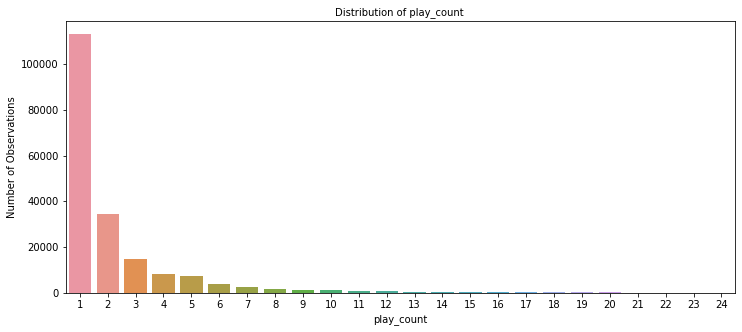

In [ ]:
# Fix the figure size of the plot
plt.figure(figsize = (12, 5))

# Code to create the countplot
ax = sns.countplot(x = (df_final.play_count < 25), data = df_final['play_count'])

plt.tick_params(labelsize = 10)

plt.title("Distribution of play_count ", fontsize = 10)

plt.xlabel("play_count", fontsize = 10)

plt.ylabel("Number of Observations", fontsize = 10)

# Show the plot
plt.show()

In [ ]:
# Converting play_count values into "rating"
# Creating conditions to assign "rating"
# Ratings key: 1 = 2, 2 = 3, 3 = 4-6, 4 = 7-11, 5 = 12+ (stars,listens)
song_rating = [
           (df_final['play_count'] >= 2) & (df_final['play_count'] < 3), # 1 star
           (df_final['play_count'] >= 3) & (df_final['play_count'] < 4), # 2 star
           (df_final['play_count'] >= 4) & (df_final['play_count'] < 7), # 3 star
           (df_final['play_count'] >= 7) & (df_final['play_count'] < 12), # 4 star
           (df_final['play_count'] >= 12), # 5 star
]

# Creating rating values i.e. stars
stars = [1, 2, 3, 4, 5]

# Creating a new column "rating" to hold converted values
df_final['rating'] = np.select(song_rating, stars)

**Visualize distribution of ratings**

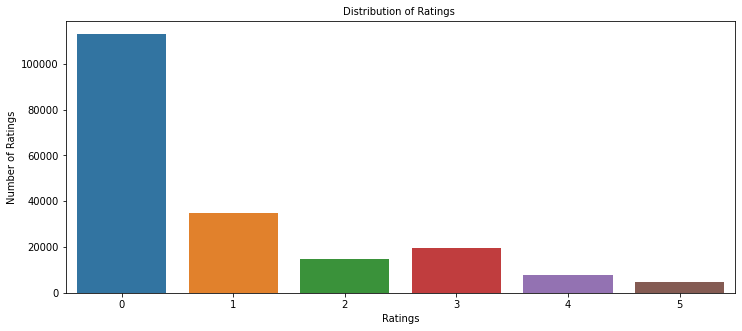

In [ ]:
# Fix the figure size of the plot
plt.figure(figsize = (12, 5))

# Code to create the countplot
ax = sns.countplot(x = df_final['rating'], data = df_final)

plt.tick_params(labelsize = 10)

plt.title("Distribution of Ratings ", fontsize = 10)

plt.xlabel("Ratings", fontsize = 10)

plt.ylabel("Number of Ratings", fontsize = 10)

# Show the plot
plt.show()

**Convert song_id and user_id from encrypted values (object) to numeric values (int32)**

In [ ]:
# Apply label encoding for "user_id" and "song_id"
# Label Encoding
le = LabelEncoder()

# Fit transform the user_id column
df_final['user_id'] = le.fit_transform(df_final['user_id'])

# Fit transform the song_id column
df_final['song_id'] = le.fit_transform(df_final['song_id'])

In [ ]:
# Display our official dataframe
df_final

,user_id,song_id,play_count,title,release,artist_name,year,artist_prime,rating
352,573,40,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0,0,2
355,573,71,2,Pogo,Idealism,Digitalism,2007,2007,1
356,573,76,20,Rorol,Identification Parade,Octopus Project,2002,2002,5
359,573,90,7,Auto-Dub,Skream!,Skream,2006,2006,4
360,573,98,2,That Was Just A Dream,Bright Like Neon Love,Cut Copy,2004,2008,1
...,...,...,...,...,...,...,...,...,...
1999745,1035,3653,2,The Police And The Private,Live It Out,Metric,2005,2009,1
1999746,1035,3656,2,Joy Ride,Day & Age,The Killers,2008,2006,1
1999760,1035,3766,2,Sweet Pea,Supply And Demand,Amos Lee,2006,2005,1
1999766,1035,3840,5,Drunk Kid Catholic,Noise Floor [Rarities 98 - 05],Bright Eyes,2000,2004,3


In [ ]:
# Verify nothing went wrong
isinstance(df_final, pd.DataFrame)

True

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

1583

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

3889

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

1550

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final['song_id'].value_counts()

136     421
837     374
2112    346
2897    295
3348    291
       ... 
897       1
3812      1
542       1
1930      1
2331      1
Name: song_id, Length: 3889, dtype: int64

Most interacted users

In [ ]:
df_final['user_id'].value_counts()

710     284
692     261
74      242
340     210
1553    209
       ... 
570       5
820       5
236       5
1061      4
966       4
Name: user_id, Length: 1583, dtype: int64

Songs released that year:

In [ ]:
year_total = df_final.groupby('year').count()['song_id'].to_frame('year_total').reset_index().drop([0])
year_total.tail()

,year,year_total
50,2006,5548
51,2007,8521
52,2008,8590
53,2009,9228
54,2010,3033


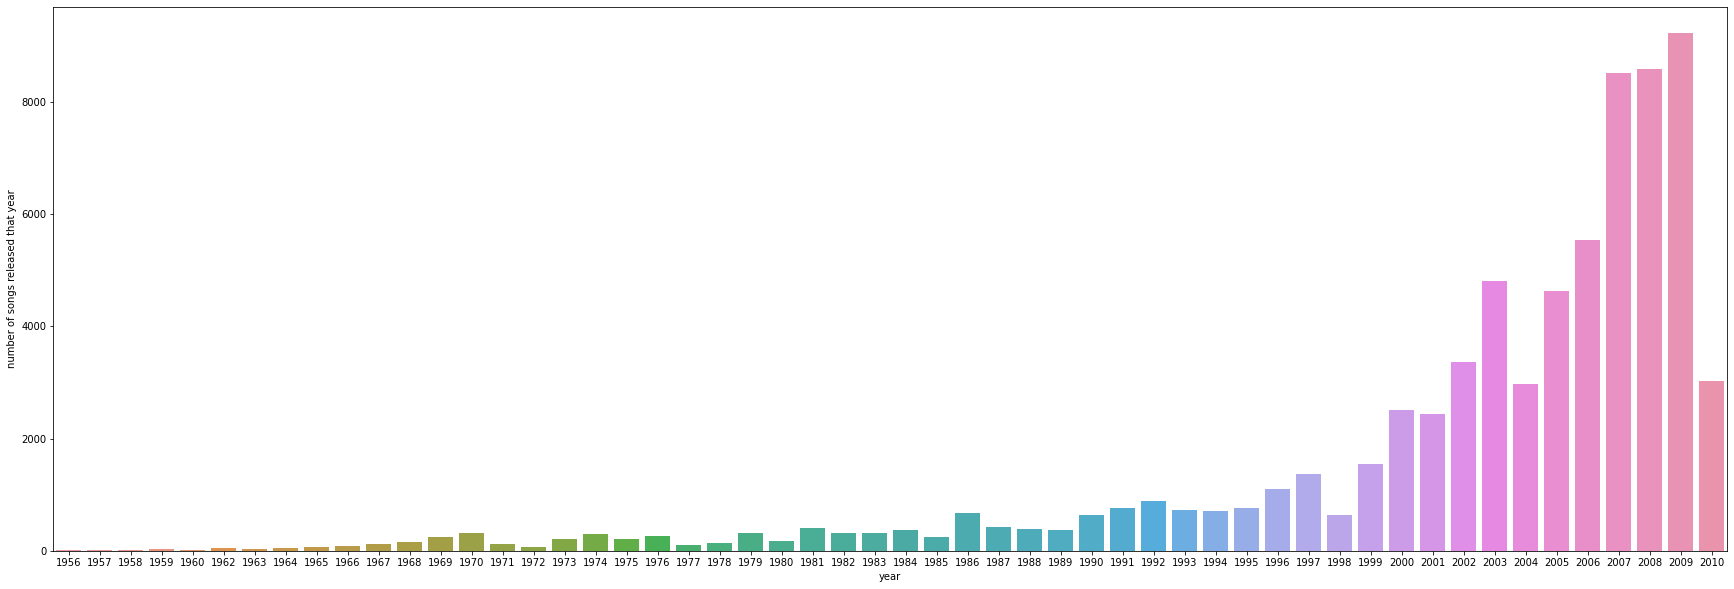

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'year',
            y = 'year_total',
            data = year_total,
            estimator = np.median)
plt.ylabel('number of songs released that year') 
# Show the plot
plt.show()

# **Milestone 2**

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,artist_prime,rating
352,573,40,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0,0,2
355,573,71,2,Pogo,Idealism,Digitalism,2007,2007,1
356,573,76,20,Rorol,Identification Parade,Octopus Project,2002,2002,5
359,573,90,7,Auto-Dub,Skream!,Skream,2006,2006,4
360,573,98,2,That Was Just A Dream,Bright Like Neon Love,Cut Copy,2004,2008,1


In [ ]:
#Calculating average play_count
average_count = df_final.groupby('song_id').mean()['rating'] # Hint: Use groupby function on the song_id column

#Calculating the frequency a song is played.
play_freq = df_final.groupby('song_id').count()['rating'] # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
final_play.head()

,avg_count,play_freq
song_id,,
0,2.333333,9
1,2.000000,14
2,2.071429,28
3,2.000000,11
4,1.928571,14


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function for finding top n 
def top_n_songs(final_play, n, min_ratings):
    
    # Finding songs with minimum number of plays
    recommendations = final_play[final_play['play_freq'] > min_ratings]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
top_10_songs = list(top_n_songs(final_play, 10, 100))
final_play.loc[top_10_songs]

,avg_count,play_freq
song_id,,
122,3.501873,267
239,3.354839,248
2409,3.168539,267
3093,3.113208,159
633,3.087963,216
241,3.058065,155
3224,3.045802,131
2164,3.012579,159
2067,3.009709,103


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity based and subsequent models we will use the "surprise" library.

In [ ]:
#Install the surprise package using pip. Uncomment and run the below code to do the same. 
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 26.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633703 sha256=a1af2e304f45e3e35f6c3616ac51d5ff5915fe5c39735ee5fcd5188ffd4d2474
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

# from lightfm import LightFM

### Some useful functions

The below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [ ]:
#The function to calulate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale = (0, 5)) #use rating scale (0,5)

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'rating']], reader) #Take only "user_id","song_id", and "rating"

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size = 0.4, random_state=42) # Take test_size=0.4

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
#Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) #use random_state=1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
#Use sim_user_user model
user_score = precision_recall_at_k(sim_user_user)

print(user_score)

RMSE: 1.2781
Precision:  0.539
Recall:  0.864
F_1 score:  0.664
None


In [ ]:
# Get user 366 info
# df_final.loc[df_final['user_id'] != 366]

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(366, 57, r_ui=3, verbose=True) #use user id 366 and song_id 57

user: 366        item: 57         r_ui = 3.00   est = 1.84   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=366, iid=57, r_ui=3, est=1.8378070823627788, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(366, 40, verbose=True) #Use user_id 366 and song_id 40

user: 366        item: 40         r_ui = None   est = 1.70   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=366, iid=40, r_ui=None, est=1.7010136226473664, details={'actual_k': 10, 'was_impossible': False})

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# fitting the data
gs.fit(data) #Use entire data for GridSearch

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
# Train the best model found in above gridsearch.
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
user_optimized_score = precision_recall_at_k(sim_user_user_optimized)

print(user_optimized_score)

RMSE: 1.2128
Precision:  0.531
Recall:  0.919
F_1 score:  0.673
None


In [ ]:
#Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui=2
sim_user_user_optimized.predict(366, 57, r_ui = 3, verbose = True)

user: 366        item: 57         r_ui = 3.00   est = 3.00   {'actual_k': 19, 'was_impossible': False}


Prediction(uid=366, iid=57, r_ui=3, est=2.9968014024791363, details={'actual_k': 19, 'was_impossible': False})

In [ ]:
#Predict the play count for a song that is not listened by the user (with user_id 6958)
sim_user_user_optimized.predict(366, 40, verbose=True)

user: 366        item: 40         r_ui = None   est = 2.18   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=366, iid=40, r_ui=None, est=2.1843386502067674, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
#Use inner id 0. 
neighbors_366 = sim_user_user_optimized.get_neighbors(0, 5)

df_neighbors = pd.DataFrame(neighbors_366, columns = ['366_neighbors'])
df_neighbors

,366_neighbors
0,171
1,162
2,148
3,578
4,58


Below we will be implementing a function where the input parameters are - 

- data: a **song** dataset
- user_id: a user id **against which we want the recommendations**
- top_n: the **number of songs we want to recommend**
- algo: the algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended song ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # extracting those song_ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the song_ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # predicting the play_count for those non visited song_ids by this user
        est = algo.predict(user_id, item_id).est
        
        # appending the predicted play_count
        recommendations.append((item_id, est))

    # sorting the predicted play_count in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted play count songs for this user

In [ ]:
#Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.
user_user_recommendations = get_recommendations(df_final, 366, 5, sim_user_user_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_counts"
user_rec = pd.DataFrame(user_user_recommendations, columns = ['song_id', 'predicted_play_counts'])
user_rec = user_rec.merge(df_final[['song_id','title','release','artist_name']], how = 'left', on = 'song_id').drop_duplicates(subset = ['song_id'])
user_rec

,song_id,predicted_play_counts,title,release,artist_name
0,1144,3.738782,Annihilation By The Hands Of God (Album Version),The All Star Sessions,Roadrunner United
38,1398,3.475715,Hypnopaedia,Identification Parade,Octopus Project
107,1841,3.468186,Behind The Sea [Live In Chicago],Live In Chicago,Panic At The Disco
227,1662,3.411875,Simple,Clock EP,Simian Mobile Disco
294,2909,3.383887,Teenage Crush,50 Rock 'N' Roll Worlwide Number Ones,Tommy Sands


In [ ]:
def get_recommendations_df(recommendations):
  
  df_rec = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts'])

  df_rec = df_rec.merge(df_final[['song_id','title','release','artist_name']], how = 'left', on = 'song_id').drop_duplicates(subset = ['song_id'])

  return df_rec

In [ ]:
get_recommendations_df(user_user_recommendations)

,song_id,predicted_play_counts,title,release,artist_name
0,1144,3.738782,Annihilation By The Hands Of God (Album Version),The All Star Sessions,Roadrunner United
38,1398,3.475715,Hypnopaedia,Identification Parade,Octopus Project
107,1841,3.468186,Behind The Sea [Live In Chicago],Live In Chicago,Panic At The Disco
227,1662,3.411875,Simple,Clock EP,Simian Mobile Disco
294,2909,3.383887,Teenage Crush,50 Rock 'N' Roll Worlwide Number Ones,Tommy Sands


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):
  # sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns= ['song_id', 'predicted_play_counts']), on = 'song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_play_counts'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  # add correction difference to display how much the prediction was affected
  ranked_songs['correction'] = ranked_songs['predicted_play_counts'] - ranked_songs['corrected_ratings']
  
  return ranked_songs

In [ ]:
#Applying the ranking_songs function on the final_play data. 
ranking_songs(user_user_recommendations, final_play)

,song_id,play_freq,predicted_play_counts,corrected_ratings,correction
3,1144,38,3.738782,3.576560,0.162221
0,1841,120,3.468186,3.376899,0.091287
1,1398,69,3.475715,3.355330,0.120386
2,1662,67,3.411875,3.289706,0.122169
4,2909,33,3.383887,3.209809,0.174078


### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
item_score = precision_recall_at_k(sim_item_item)

print(item_score)

RMSE: 1.1952
Precision:  0.534
Recall:  0.782
F_1 score:  0.635
None


In [ ]:
#predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user.
sim_item_item.predict(366, 57, r_ui = 3, verbose = True)

user: 366        item: 57         r_ui = 3.00   est = 1.85   {'actual_k': 37, 'was_impossible': False}


Prediction(uid=366, iid=57, r_ui=3, est=1.8511923524771978, details={'actual_k': 37, 'was_impossible': False})

In [ ]:
#Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(366, 40, verbose = True)

user: 366        item: 40         r_ui = None   est = 1.92   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=366, iid=40, r_ui=None, est=1.922915015865875, details={'actual_k': 18, 'was_impossible': False})

In [ ]:
#Apply grid search for enhancing model performance

# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# fitting the data
gs.fit(data)

# find best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
#Apply the best modle found in the grid search.
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 20, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
item_optimized_score = precision_recall_at_k(sim_item_item_optimized)

print(item_optimized_score)

RMSE: 1.1869
Precision:  0.54
Recall:  0.857
F_1 score:  0.663
None


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(366, 57, r_ui = 3, verbose = True)

user: 366        item: 57         r_ui = 3.00   est = 2.85   {'actual_k': 13, 'was_impossible': False}


Prediction(uid=366, iid=57, r_ui=3, est=2.8539991825668447, details={'actual_k': 13, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user.
sim_item_item_optimized.predict(366, 40, verbose = True)

user: 366        item: 40         r_ui = None   est = 1.00   {'actual_k': 3, 'was_impossible': False}


Prediction(uid=366, iid=40, r_ui=None, est=1.0, details={'actual_k': 3, 'was_impossible': False})

In [ ]:
#Find five most similar users to the user with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[164, 2296, 431, 1129, 230]

In [ ]:
#Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine.
item_item_recommendations = get_recommendations(df_final, 366, 5, sim_item_item_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(item_item_recommendations, columns = ['song_id', 'predicted_play_counts'])

,song_id,predicted_play_counts
0,3048,3.855730
1,2257,3.854790
2,277,3.844357
3,1624,3.783754
4,3377,3.747637


In [ ]:
#Applying the ranking_songs function. 
ranking_songs(item_item_recommendations, final_play)

,song_id,play_freq,predicted_play_counts,corrected_ratings,correction
1,3048,164,3.855730,3.777643,0.078087
3,277,60,3.844357,3.715258,0.129099
0,1624,189,3.783754,3.711015,0.072739
4,2257,28,3.854790,3.665808,0.188982
2,3377,108,3.747637,3.651412,0.096225


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
svd_score = precision_recall_at_k(svd)

print(svd_score)

RMSE: 1.1419
Precision:  0.544
Recall:  0.859
F_1 score:  0.666
None


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui=2
svd.predict(366, 57, r_ui = 3, verbose = True)

user: 366        item: 57         r_ui = 3.00   est = 2.04   {'was_impossible': False}


Prediction(uid=366, iid=57, r_ui=3, est=2.035997349658963, details={'was_impossible': False})

In [ ]:
# Making prediction for user who has not listened the song (song_id 3232)
svd.predict(366, 40, verbose = True)

user: 366        item: 40         r_ui = None   est = 1.62   {'was_impossible': False}


Prediction(uid=366, iid=40, r_ui=None, est=1.6190799562736233, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# performe 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10, store it in the system_scores list and print the results
svd_optimized_score = precision_recall_at_k(svd_optimized)

RMSE: 1.1347
Precision:  0.548
Recall:  0.852
F_1 score:  0.667


In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(366, 57, r_ui = 3, verbose = True)

user: 366        item: 57         r_ui = 3.00   est = 1.88   {'was_impossible': False}


Prediction(uid=366, iid=57, r_ui=3, est=1.8776039787414076, details={'was_impossible': False})

In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(366, 40, verbose = True)

user: 366        item: 40         r_ui = None   est = 1.59   {'was_impossible': False}


Prediction(uid=366, iid=40, r_ui=None, est=1.593601505026871, details={'was_impossible': False})

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.
svd_recommendations = get_recommendations(df_final, 366, 5, svd_optimized)

In [ ]:
#Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_play_counts,corrected_ratings,correction
2,2546,8,3.532780,3.179227,0.353553
0,1818,11,3.479348,3.177837,0.301511
3,1366,7,3.508253,3.130289,0.377964
1,2771,10,3.446422,3.130194,0.316228
4,3726,6,3.429137,3.020889,0.408248


In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
# Print out all final metrics for systems to compare side by side

print('\n' + color.UNDERLINE + color.BOLD + 'sim_user_user:' + color.END)
precision_recall_at_k(sim_user_user)

print('\n' + color.UNDERLINE + color.BOLD + 'sim_user_user_optimized:' + color.END)
precision_recall_at_k(sim_user_user_optimized)

print('\n' + color.UNDERLINE + color.BOLD + 'sim_item_item:' + color.END)
precision_recall_at_k(sim_item_item)

print('\n' + color.UNDERLINE + color.BOLD + 'sim_item_item_optimized:' + color.END)
precision_recall_at_k(sim_item_item_optimized)

print('\n' + color.UNDERLINE + color.BOLD + 'svd:' + color.END)
precision_recall_at_k(svd)

print('\n' + color.UNDERLINE + color.BOLD + 'svd_optimized:' + color.END)
precision_recall_at_k(svd_optimized)


sim_user_user:
RMSE: 1.2781
Precision:  0.539
Recall:  0.864
F_1 score:  0.664

sim_user_user_optimized:
RMSE: 1.2128
Precision:  0.531
Recall:  0.919
F_1 score:  0.673

sim_item_item:
RMSE: 1.1952
Precision:  0.534
Recall:  0.782
F_1 score:  0.635

sim_item_item_optimized:
RMSE: 1.1869
Precision:  0.54
Recall:  0.857
F_1 score:  0.663

svd:
RMSE: 1.1419
Precision:  0.544
Recall:  0.859
F_1 score:  0.666

svd_optimized:
RMSE: 1.1347
Precision:  0.548
Recall:  0.852
F_1 score:  0.667


### Content Based Recommendation Systems

In [ ]:
# Converting integers to string types for content model
df_small = df_final.astype({'year' : str, 'artist_prime' : str})

In [ ]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name'] + ' ' + df_small['year'] + ' ' + df_small['artist_prime']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,artist_prime,rating,text
352,573,40,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0,0,2,Phantom Part 1.5 (Album Version) A Cross The U...
355,573,71,2,Pogo,Idealism,Digitalism,2007,2007,1,Pogo Idealism Digitalism 2007 2007
356,573,76,20,Rorol,Identification Parade,Octopus Project,2002,2002,5,Rorol Identification Parade Octopus Project 20...
359,573,90,7,Auto-Dub,Skream!,Skream,2006,2006,4,Auto-Dub Skream! Skream 2006 2006
360,573,98,2,That Was Just A Dream,Bright Like Neon Love,Cut Copy,2004,2008,1,That Was Just A Dream Bright Like Neon Love Cu...


In [ ]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[[ 'user_id', 'song_id', 'rating', 'title', 'text']]

#drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

#Set the title column as the 
df_small = df_small.set_index('title')

# see the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,rating,text
title,,,,
Phantom Part 1.5 (Album Version),573,40,2,Phantom Part 1.5 (Album Version) A Cross The U...
Pogo,573,71,1,Pogo Idealism Digitalism 2007 2007
Rorol,573,76,5,Rorol Identification Parade Octopus Project 20...
Auto-Dub,573,90,4,Auto-Dub Skream! Skream 2006 2006
That Was Just A Dream,573,98,1,That Was Just A Dream Bright Like Neon Love Cu...


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
indices[:5]

0    Phantom Part 1.5 (Album Version)
1                                Pogo
2                               Rorol
3                            Auto-Dub
4               That Was Just A Dream
Name: title, dtype: object

In [ ]:
#Importing necessary packages to work with text data
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words("english")] #Use stopwords of english
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
#Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array.
review_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()
pd.DataFrame(review_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,6085,6086,6087,6088,6089,6090,6091,6092,6093,6094
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_review = cosine_similarity(review_tfidf, review_tfidf)
similar_review

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
rec_content = recommendations('Learn To Fly', similar_review)
df_content = pd.DataFrame(rec_content, columns = ['title'])
df_content

[2024, 1409, 2023, 2391, 2710, 1415, 277, 2228, 1201, 3184]


,title
0,Breakout
1,Big Me
2,What If I Do?
3,All My Life
4,Next Year
5,Everlong
6,The Pretender
7,Skin And Bones
8,Just Lose It
9,You Learn (Album Version)


In [ ]:
# Getting more song info to evaluate recommendations
df_small.loc[rec_content]

,user_id,song_id,rating,text
title,,,,
Breakout,127,1912,1,Breakout There Is Nothing Left To Lose Foo Fig...
Big Me,1199,2742,2,Big Me Foo Fighters Foo Fighters 1992 1999
What If I Do?,127,1769,4,What If I Do? In Your Honour Foo Fighters 2005...
All My Life,726,1947,3,All My Life ONE BY ONE Foo Fighters 2002 1999
Next Year,0,3759,2,Next Year Skin And Bones Foo Fighters 1999 1999
Everlong,1199,3618,1,Everlong The Colour And The Shape (Special Edi...
The Pretender,1071,2532,1,The Pretender Echoes_ Silence_ Patience & Grac...
Skin And Bones,158,882,2,Skin And Bones Skin And Bones Foo Fighters 200...
Just Lose It,11,3230,1,Just Lose It Curtain Call Eminem 2004 2002


In [ ]:
%%shell
jupyter nbconvert --to html /content/MIT_Capstone_Final_Code.ipynb

[NbConvertApp] Converting notebook /content/MIT_Capstone_Final_Code.ipynb to html
[NbConvertApp] Writing 596813 bytes to /content/MIT_Capstone_Final_Code.html
